<a href="https://colab.research.google.com/github/calopezj/Accidentalidad2020/blob/master/2020_Accidentalidad_An%C3%A1lisis_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime


1 - Importe el dataset de accidentalidad de la URL:
"https://raw.githubusercontent.com/calopezj/Accidentalidad/master/accidentalidad.csv"


In [ ]:
pdAccidentalidad = pd.read_csv(
    "https://raw.githubusercontent.com/calopezj/Accidentalidad/master/accidentalidad.csv",
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números
pdAccidentalidad.head()

,@timestamp,CBML,EXPEDIENTE,tipo,Direccion encasillada,CLASE_ACCIDENTE,location,Mes,Año,comuna,tags,DIRECCION,host,path,Numcomuna,Diseño,barrio,GRAVEDAD_ACCIDENTE,FECHA_ACCIDENTE,y,x,@version,Id,NRO_RADICADO
0,2019-06-04T20:44:03.039Z,708.0,A1484623,Malla vial,CR 080 079 C 000 00000,Choque,"[-75.5846584729, 6.28257144516]",2,2014,Robledo,[u'incidentes'],CR 80 CL 79 C,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,07,Tramo de via,Altamira,Solo daños,2014-02-14T22:30:00.000Z,1186726.32,833206.79,1,5251,1429648
1,2019-06-04T20:44:03.040Z,502.0,A1484637,Malla vial,CR 064 C 110 000 00000,Choque,"[-75.5617778582, 6.3034471604]",2,2014,Castilla,[u'incidentes'],CR 64 C CL 110,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,05,Tramo de via,Las Brisas,Solo daños,2014-02-14T13:40:00.000Z,1189028.44,835746.06,1,5252,1429659
2,2019-06-04T20:44:03.040Z,1510.0,A1485063,Malla vial,CR 050 S 008 000 00000,Choque,"[-75.5801585514, 6.20022627101]",2,2014,Guayabal,[u'incidentes'],CR 50 CL 8 Sur,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,15,Tramo de via,Guayabal,Solo daños,2014-02-14T19:15:00.000Z,1177615.47,833678.92,1,5253,1429753
3,2019-06-04T20:44:03.041Z,1603.0,A1485168,Malla vial,CR 080 030 000 00000,Choque,"[-75.6006896809, 6.23107041857]",2,2014,Belén,[u'incidentes'],CR 80 CL 30,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,16,Tramo de via,Belén,Solo daños,2014-02-15T02:45:00.000Z,1181034.11,831415.73,1,5256,1429815
4,2019-06-04T20:44:03.042Z,412.0,A1484257,Malla vial,CL 090 048 000 00000,Atropello,"[-75.5557424542, 6.28209069323]",2,2014,Aranjuez,[u'incidentes'],CL 90 CR 48,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,04,Tramo de via,La Piñuela,Con heridos,2014-02-15T05:15:00.000Z,1186664.01,836407.42,1,5259,1429191


In [ ]:
pdAccidentalidad.head()

,@timestamp,CBML,EXPEDIENTE,tipo,Direccion encasillada,CLASE_ACCIDENTE,location,Mes,Año,comuna,tags,DIRECCION,host,path,Numcomuna,Diseño,barrio,GRAVEDAD_ACCIDENTE,FECHA_ACCIDENTE,y,x,@version,Id,NRO_RADICADO
0,2019-06-04T20:44:03.039Z,708.0,A1484623,Malla vial,CR 080 079 C 000 00000,Choque,"[-75.5846584729, 6.28257144516]",2,2014,Robledo,[u'incidentes'],CR 80 CL 79 C,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,07,Tramo de via,Altamira,Solo daños,2014-02-14T22:30:00.000Z,1186726.32,833206.79,1,5251,1429648
1,2019-06-04T20:44:03.040Z,502.0,A1484637,Malla vial,CR 064 C 110 000 00000,Choque,"[-75.5617778582, 6.3034471604]",2,2014,Castilla,[u'incidentes'],CR 64 C CL 110,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,05,Tramo de via,Las Brisas,Solo daños,2014-02-14T13:40:00.000Z,1189028.44,835746.06,1,5252,1429659
2,2019-06-04T20:44:03.040Z,1510.0,A1485063,Malla vial,CR 050 S 008 000 00000,Choque,"[-75.5801585514, 6.20022627101]",2,2014,Guayabal,[u'incidentes'],CR 50 CL 8 Sur,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,15,Tramo de via,Guayabal,Solo daños,2014-02-14T19:15:00.000Z,1177615.47,833678.92,1,5253,1429753
3,2019-06-04T20:44:03.041Z,1603.0,A1485168,Malla vial,CR 080 030 000 00000,Choque,"[-75.6006896809, 6.23107041857]",2,2014,Belén,[u'incidentes'],CR 80 CL 30,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,16,Tramo de via,Belén,Solo daños,2014-02-15T02:45:00.000Z,1181034.11,831415.73,1,5256,1429815
4,2019-06-04T20:44:03.042Z,412.0,A1484257,Malla vial,CL 090 048 000 00000,Atropello,"[-75.5557424542, 6.28209069323]",2,2014,Aranjuez,[u'incidentes'],CL 90 CR 48,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,04,Tramo de via,La Piñuela,Con heridos,2014-02-15T05:15:00.000Z,1186664.01,836407.42,1,5259,1429191


# Análisis temporal

### Creamos una columna tipo Datetime

In [ ]:
pdAccidentalidad['Date'] = pd.to_datetime(pdAccidentalidad['FECHA_ACCIDENTE'])
#pdAccidentalidad['Date'].head(20)
pdAccidentalidad.head(10)

,@timestamp,CBML,EXPEDIENTE,tipo,Direccion encasillada,CLASE_ACCIDENTE,location,Mes,Año,comuna,tags,DIRECCION,host,path,Numcomuna,Diseño,barrio,GRAVEDAD_ACCIDENTE,FECHA_ACCIDENTE,y,x,@version,Id,NRO_RADICADO,Date
0,2019-06-04T20:44:03.039Z,708.0,A1484623,Malla vial,CR 080 079 C 000 00000,Choque,"[-75.5846584729, 6.28257144516]",2,2014,Robledo,[u'incidentes'],CR 80 CL 79 C,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,07,Tramo de via,Altamira,Solo daños,2014-02-14T22:30:00.000Z,1186726.32,833206.79,1,5251,1429648,2014-02-14 22:30:00+00:00
1,2019-06-04T20:44:03.040Z,502.0,A1484637,Malla vial,CR 064 C 110 000 00000,Choque,"[-75.5617778582, 6.3034471604]",2,2014,Castilla,[u'incidentes'],CR 64 C CL 110,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,05,Tramo de via,Las Brisas,Solo daños,2014-02-14T13:40:00.000Z,1189028.44,835746.06,1,5252,1429659,2014-02-14 13:40:00+00:00
2,2019-06-04T20:44:03.040Z,1510.0,A1485063,Malla vial,CR 050 S 008 000 00000,Choque,"[-75.5801585514, 6.20022627101]",2,2014,Guayabal,[u'incidentes'],CR 50 CL 8 Sur,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,15,Tramo de via,Guayabal,Solo daños,2014-02-14T19:15:00.000Z,1177615.47,833678.92,1,5253,1429753,2014-02-14 19:15:00+00:00
3,2019-06-04T20:44:03.041Z,1603.0,A1485168,Malla vial,CR 080 030 000 00000,Choque,"[-75.6006896809, 6.23107041857]",2,2014,Belén,[u'incidentes'],CR 80 CL 30,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,16,Tramo de via,Belén,Solo daños,2014-02-15T02:45:00.000Z,1181034.11,831415.73,1,5256,1429815,2014-02-15 02:45:00+00:00
4,2019-06-04T20:44:03.042Z,412.0,A1484257,Malla vial,CL 090 048 000 00000,Atropello,"[-75.5557424542, 6.28209069323]",2,2014,Aranjuez,[u'incidentes'],CL 90 CR 48,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,04,Tramo de via,La Piñuela,Con heridos,2014-02-15T05:15:00.000Z,1186664.01,836407.42,1,5259,1429191,2014-02-15 05:15:00+00:00
5,2019-06-04T20:44:03.042Z,101.0,A1484597,EPM con Interior,CR 040 120 000 00000,Caída de Ocupante,"[-75.5442529552, 6.3018417649]",2,2014,Popular,[u'incidentes'],CR 40 CL 120,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,01,Tramo de via,Santo Domingo Savio No.1,Con heridos,2014-02-15T06:00:00.000Z,1188845.36,837685.34,1,5260,1429192,2014-02-15 06:00:00+00:00
6,2019-06-04T20:44:03.042Z,1019.0,A1484678,Malla vial,CR 050 049 000 00000,Choque,"[-75.5682308461, 6.24865427739]",2,2014,La Candelaria,[u'incidentes'],CR 50 CL 49,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,10,Tramo de via,La Candelaria,Con heridos,2014-02-15T21:30:00.000Z,1182969.05,835014.55,1,5262,1429248,2014-02-15 21:30:00+00:00
7,2019-06-04T20:44:03.043Z,1001.0,A1484110,Malla vial,CR 051 064 000 00000,Caída de Ocupante,"[-75.5642888721, 6.26149302503]",2,2014,La Candelaria,[u'incidentes'],CR 51 CL 64,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,10,Tramo de via,Prado,Con heridos,2014-02-16T03:40:00.000Z,1184388.09,835454.94,1,5268,1429256,2014-02-16 03:40:00+00:00
8,2019-06-04T20:44:03.044Z,8000.0,A1484687,Malla vial,CR 066 A 038 A 000 00000,Choque,"[-75.6470472103, 6.18570781509]",2,2014,Corregimiento de San Antonio de Prado,[u'incidentes'],CR 66 A CL 38 A,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,80,Tramo de via,Cabecera San Antonio de Prado,Con heridos,2014-02-15T22:00:00.000Z,1176030.77,826268.81,1,5279,1429268,2014-02-15 22:00:00+00:00
9,2019-06-04T20:44:03.045Z,517.0,A1484642,Malla vial,CR 064 C 072 000 00000,Choque,"[-75.5739606743, 6.27039040864]",2,2014,Castilla,[u'incidentes'],CR 64 C CL 72,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,05,Tramo de via,Caribe,Con heridos,2014-02-15T19:00:00.000Z,1185375.40,834387.11,1,5280,1429269,2014-02-15 19:00:00+00:00


### Agrupamiento por medio-mes usando la función *resample*

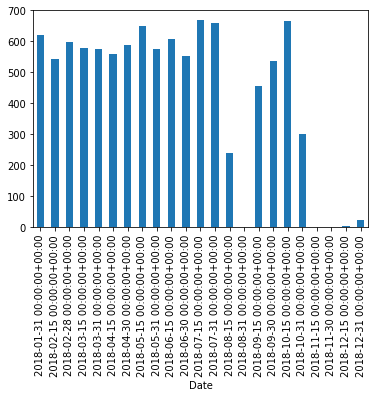

In [ ]:
#pdAccidentalidad[pdAccidentalidad['Año'] == 2018].resample('SM', on = "Date").count()['EXPEDIENTE']
pdAccidentalidad[pdAccidentalidad['Año'] == 2018].resample('SM', on = "Date").count()['Id'].plot.bar()
#.resample('SM', on = "Date").count()['EXPEDIENTE'].plot.bar()

### Agrupamiento por mes usando *groupby*

In [ ]:
#pdAccidentalidad[pdAccidentalidad['Año'] == 2018][['Mes', 'EXPEDIENTE']].groupby('Mes').count()
pdAccidentalidad[['Año', 'EXPEDIENTE']].groupby('Año').count()

,EXPEDIENTE
Año,
2014,9990
2015,10000
2016,9994
2017,9990
2018,10000
2019,6914


## Análisis de días especiales

### Definición de días hábiles

In [ ]:
pdAccidentalidad['EsHabil'] = pdAccidentalidad['Date'].map(lambda x: 0 if x.weekday() > 4 else 1)
pdAccidentalidad.tail(20)

,@timestamp,CBML,EXPEDIENTE,tipo,Direccion encasillada,CLASE_ACCIDENTE,location,Mes,Año,comuna,tags,DIRECCION,host,path,Numcomuna,Diseño,barrio,GRAVEDAD_ACCIDENTE,FECHA_ACCIDENTE,y,x,@version,Id,NRO_RADICADO,Date,EsHabil
56894,2019-06-04T20:57:29.485Z,409.0,A000932636,Malla vial,CR 046 072 A 000 00000,Choque,"[-75.5561549433, 6.26799047442]",3,2019,Aranjuez,[u'incidentes'],CR 46 CL 72 A,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,04,Interseccion,Manrique Central No. 1,Con heridos,2019-03-31T09:05:00.000Z,1185104.32,836357.36,1,238527,1665369,2019-03-31 09:05:00+00:00,0
56895,2019-06-04T20:57:29.485Z,701.0,A000932644,Malla vial aproximada: CR 63-63,CR 062 063 000 00000,Choque,"[-75.5733203488, 6.26303021803]",3,2019,Robledo,[u'incidentes'],CR 62 CL 63,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,07,Tramo de via,Universidad Nacional,Con heridos,2019-03-31T12:40:00.000Z,1184560.98,834455.67,1,238530,1665367,2019-03-31 12:40:00+00:00,0
56896,2019-06-04T20:57:29.485Z,908.0,A000932839,Malla vial,CR 029 045 000 00000,Choque,"[-75.5536930819, 6.23724889027]",3,2019,Buenos Aires,[u'incidentes'],CR 29 CL 45,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,09,Tramo de via,Miraflores,Solo daños,2019-03-31T15:08:00.000Z,1181702.81,836620.33,1,238534,1665471,2019-03-31 15:08:00+00:00,0
56897,2019-06-04T20:57:29.485Z,1601.0,A000932640,Malla vial,CL 033 065 C 000 00000,Choque,"[-75.5849210579, 6.23937642574]",3,2019,Belén,[u'incidentes'],CL 33 CR 65 C,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,16,Tramo de via,Fátima,Con heridos,2019-03-31T15:10:00.000Z,1181947.95,833164.01,1,238535,1665327,2019-03-31 15:10:00+00:00,0
56898,2019-06-04T20:57:29.485Z,1005.0,A000932642,Malla vial,CR 051 D 056 000 00000,Atropello,"[-75.5671267051, 6.25526925093]",3,2019,La Candelaria,[u'incidentes'],CR 51 D CL 56,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,10,Tramo de via,Estación Villa,Con heridos,2019-03-31T16:40:00.000Z,1183700.48,835138.85,1,238537,1665352,2019-03-31 16:40:00+00:00,0
56899,2019-06-04T20:57:30.148Z,1419.0,A000932834,Malla vial aproximada: CR 48-10,CR 048 011 000 00000,Choque,"[-75.5761497859, 6.21364704347]",3,2019,El Poblado,[u'incidentes'],CR 48 CL 11,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,14,Tramo de via,Manila,Solo daños,2019-03-31T16:50:00.000Z,1179098.88,834126.93,1,238540,1665449,2019-03-31 16:50:00+00:00,0
56900,2019-06-04T20:57:30.148Z,1423.0,A000932836,Malla vial,CR 048 S 015 000 00000,Choque,"[-75.5798968196, 6.19247855608]",3,2019,El Poblado,[u'incidentes'],CR 48 CL 15 Sur,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,14,Tramo de via,Santa María de los Ángeles,Solo daños,2019-03-31T17:00:00.000Z,1176758.30,833705.47,1,238542,1665456,2019-03-31 17:00:00+00:00,0
56901,2019-06-04T20:57:30.148Z,NaN,A000932659,No Ubicada,CR 062 076 000 00000,Volcamiento,"[-75.7037762763, 6.22141524356]",3,2019,NaN,[u'incidentes'],CR 62 CL 76,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,Sin Inf,Tramo de via,NaN,Con heridos,2019-03-31T17:30:00.000Z,1180000.00,820000.00,1,238544,1665525,2019-03-31 17:30:00+00:00,0
56902,2019-06-04T20:57:30.148Z,NaN,A000932647,No Ubicada,CR 092 A 518 000 00000,Caida Ocupante,"[-75.7037762763, 6.22141524356]",3,2019,NaN,[u'incidentes'],CR 92 A CL 518,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,Sin Inf,Tramo de via,NaN,Con heridos,2019-03-31T17:40:00.000Z,1180000.00,820000.00,1,238545,1665348,2019-03-31 17:40:00+00:00,0
56903,2019-06-04T20:57:30.148Z,1406.0,A000932835,Malla vial,CR 034 011 A 000 00000,Choque,"[-75.5643913101, 6.21251077629]",3,2019,El Poblado,[u'incidentes'],CR 34 CL 11 A,Operador2,C:/ELK/logstash-6.5.1/data/Medata/Incidentes/I...,14,Tramo de via,Las Lomas No.1,Solo daños,2019-03-31T18:30:00.000Z,1178969.51,835428.32,1,238546,1665451,2019-03-31 18:30:00+00:00,0


### Comparación cantidad de accidentes en días hábiles *vs.* no hábiles


In [ ]:
pdAccidentalidad.groupby(['Año', 'EsHabil']).count()['EXPEDIENTE']

Año   EsHabil
2014  0          2542
      1          7448
2015  0          2615
      1          7385
2016  0          2544
      1          7450
2017  0          2271
      1          7719
2018  0          2605
      1          7395
2019  0          1696
      1          5218
Name: EXPEDIENTE, dtype: int64